In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt

# Algorithm

In [2]:
def uncertain_network_generator(G, p):
    new_edges = []
    for edge in list(G.edges):
        P = np.random.normal(0.8, 0.1**2, 1)
        while (p <= 0) or (p >1):
            P = np.random.normal(0.8, 0.1**2, 1)
        new_edges.append((edge[0], edge[1], {'weight' : P[0]}))
    G = nx.Graph()
    G.add_edges_from(new_edges)
    non_existential_edge_count = len(G.edges) * p
    complement_edges = list(nx.complement(G).edges)
    while non_existential_edge_count > 0:
        new_edge = random.sample(complement_edges, 1)[0]
        complement_edges.remove(new_edge)
        P = np.random.normal(0.2, 0.1**2, 1)
        while (p <= 0) or (p >1):
            P = np.random.normal(0.8, 0.1**2, 1)
        G.add_edge(new_edge[0], new_edge[1], weight=P[0])
        non_existential_edge_count = non_existential_edge_count - 1
    return G

# Example

## Zachary Karate Club (certain network)

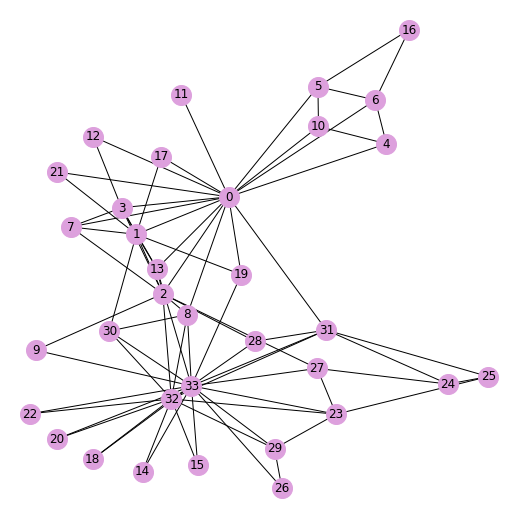

In [3]:
G = nx.karate_club_graph()
plt.figure(figsize=(7,7))
nx.draw(G, 
        pos=nx.spring_layout(G, seed=42),
        with_labels = True,
       node_size=400,
       node_color='plum')

## Uncertain Zachary Karate Club Network

In [4]:
UG = uncertain_network_generator(G, 0.2)

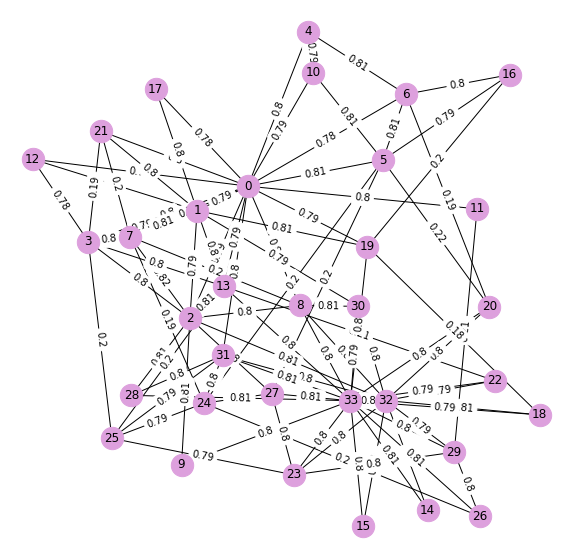

In [6]:
plt.figure(figsize=(10,10))
pos=nx.spring_layout(UG, seed=8)
nx.draw_networkx(UG, 
        pos,
        with_labels = True,
       node_size=500,
       node_color='plum')
labels = nx.get_edge_attributes(UG,'weight')
labels = {k:round(v, 2) for k,v in labels.items()}
nx.draw_networkx_edge_labels(UG,pos,edge_labels=labels)
plt.axis('off')
plt.show()